# Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay

from sklearn.pipeline import Pipeline
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

# Load Data

In [2]:
df = pd.read_csv("hotel_bookings.csv")

# First five records of dataset

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Last five records of dataset

In [4]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


# Number of Rows and Features

In [5]:
df.shape

(119390, 32)

# Number of Rows

In [6]:
df.index

RangeIndex(start=0, stop=119390, step=1)

# Names of Features

In [7]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# Dataset Structure summary(rows, features, data types of each feature)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Statistics of Dataframe

# Numeric type data

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


## categorical data

In [10]:
df.describe(include = "object").T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


# Seperate date, month , year from reservation_status_date feature

### Change data type of feature from object to datetime 

In [11]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

### Create new features

In [13]:
df["reservation_status_day"] = df["reservation_status_date"].dt.day
df["reservation_status_month"] = df["reservation_status_date"].dt.month
df["reservation_status_year"] = df["reservation_status_date"].dt.year

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

# Visualization

In [15]:
target = 'is_canceled'
features = [col for col in df.columns if col != target]

In [16]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).drop(columns= target)
numeric_features.columns

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

# Distribution of stays across different hotel types

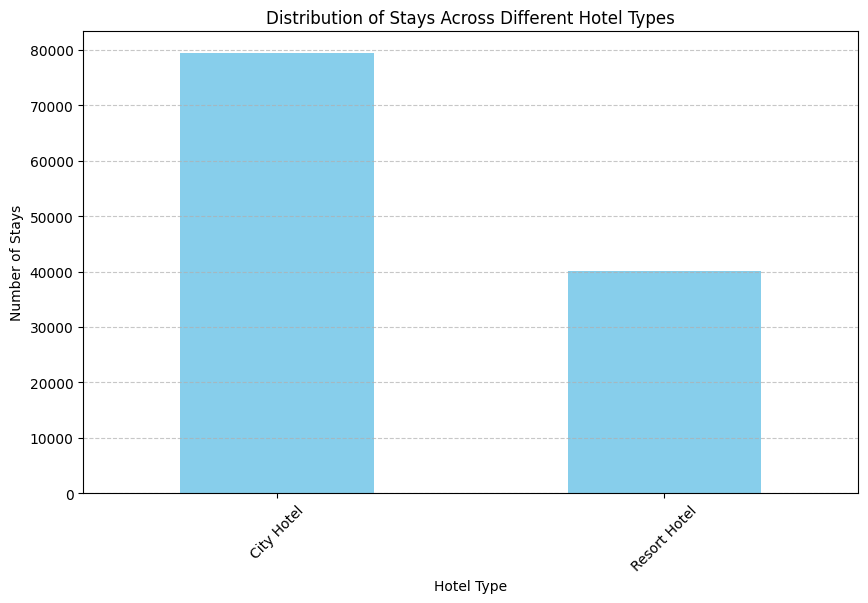

In [17]:
hotel_type_counts = df["hotel"].value_counts()
plt.figure(figsize=(10, 6))
hotel_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Stays Across Different Hotel Types')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Stays')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Average daily rate (ADR) trends

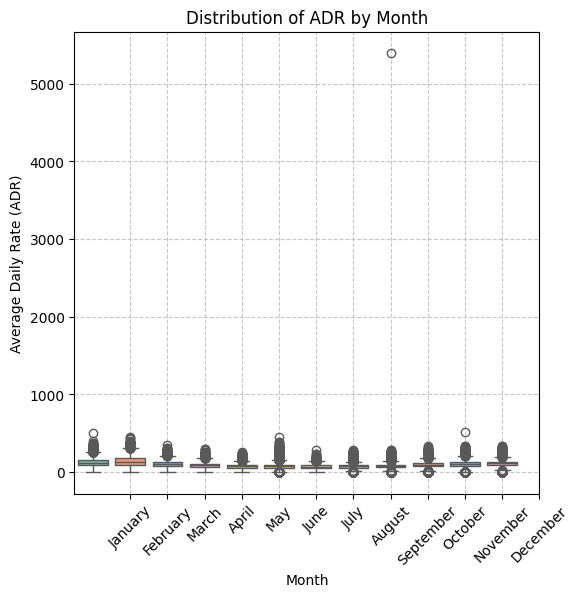

In [18]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='arrival_date_month', y='adr', data=df, palette='Set2')
plt.title('Distribution of ADR by Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(ticks=range(1, 13), labels=pd.date_range(start='2024-01-01', periods=12, freq='M').strftime('%B'), rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [19]:
df["adr"].mean()

101.83112153446686

In [20]:
df["adr"].median()

94.575

In [21]:
df["adr"].mode()

0    62.0
Name: adr, dtype: float64

### On the basis of mean, median, mode i decide the threshold value if 350

In [28]:
def removal_box_plot(df, column, threshold):

    removed_outliers = df[df[column] <= threshold]
    return removed_outliers


threshold_value = 350

df = removal_box_plot(df, 'adr', threshold_value)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_day,reservation_status_month,reservation_status_year
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,1,7,2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,1,7,2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,2,7,2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,2,7,2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.00,0,1,Check-Out,2015-07-03,3,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,Transient,96.14,0,0,Check-Out,2017-09-06,6,9,2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,Transient,225.43,0,2,Check-Out,2017-09-07,7,9,2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,Transient,157.71,0,4,Check-Out,2017-09-07,7,9,2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,Transient,104.40,0,0,Check-Out,2017-09-07,7,9,2017


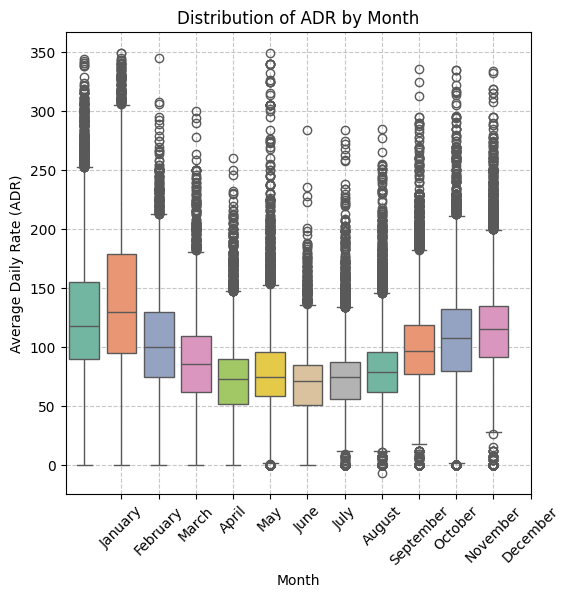

In [32]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='arrival_date_month', y='adr', data=df, palette='Set2')
plt.title('Distribution of ADR by Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(ticks=range(1, 13), labels=pd.date_range(start='2024-01-01', periods=12, freq='M').strftime('%B'), rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

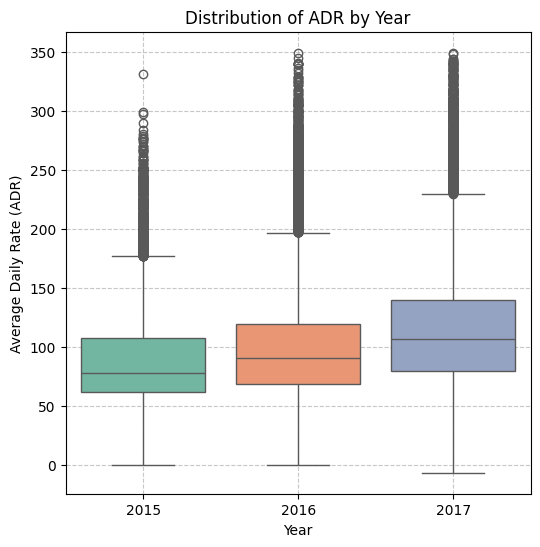

In [33]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='arrival_date_year', y='adr', data=df, palette='Set2')
plt.title('Distribution of ADR by Year')
plt.xlabel('Year')
plt.ylabel('Average Daily Rate (ADR)')
# plt.xticks(ticks=range(1, 13), labels=pd.date_range(start='2024-01-01', periods=12, freq='M').strftime('%B'), rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 53 outliers have been removed based on the threshold we have defined. After we have viewed box plot of ADR vs Month. So based on mean, median, mode of adr i have considered thereshold as 350.

# Cancellation rates

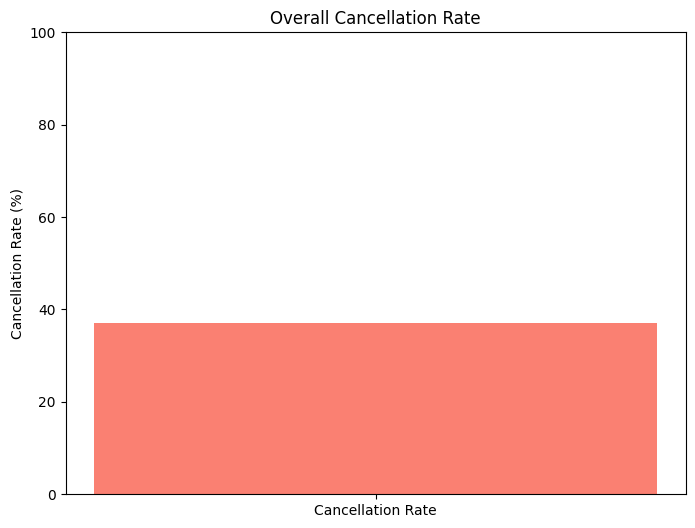

In [21]:
cancellation_rate = df['is_canceled'].mean() * 100

# Plot
plt.figure(figsize=(8, 6))
plt.bar(['Cancellation Rate'], [cancellation_rate], color='salmon')
plt.title('Overall Cancellation Rate')
plt.ylabel('Cancellation Rate (%)')
plt.ylim(0, 100)
plt.show()


# Factors affecting cancellations

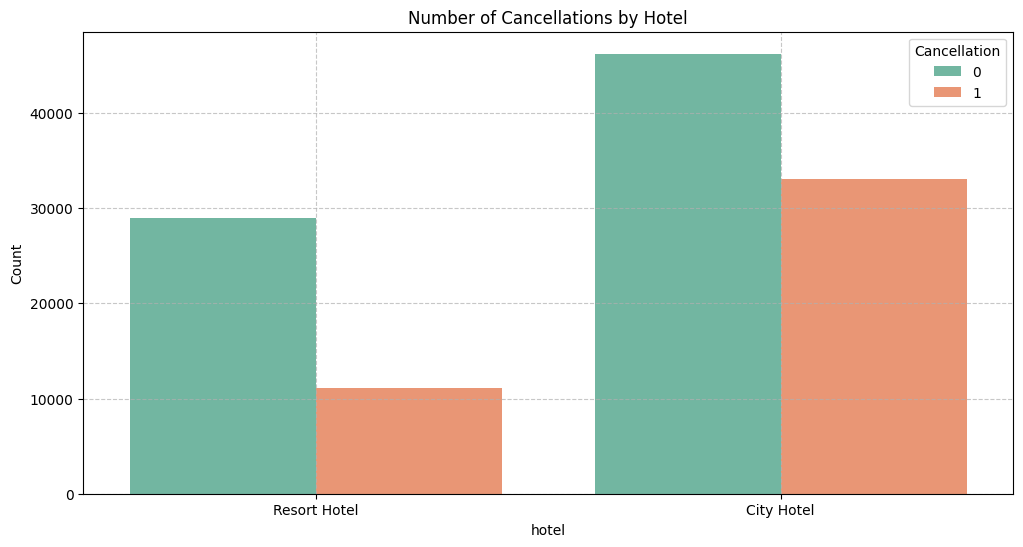

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Set2')
plt.title('Number of Cancellations by Hotel')
plt.xlabel('hotel')
plt.ylabel('Count')
plt.legend(title='Cancellation')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


### From above graph we can see that rate of cancellation of City hotels are more than Resort hotels

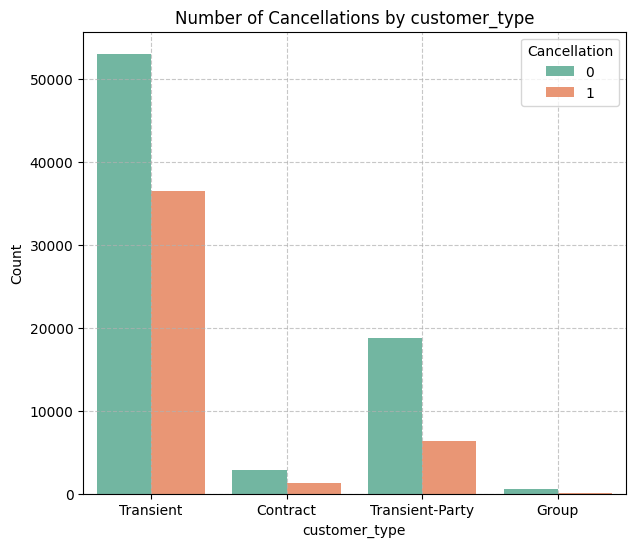

In [39]:
plt.figure(figsize=(7, 6))
sns.countplot(x='customer_type', hue='is_canceled', data=df, palette='Set2')
plt.title('Number of Cancellations by customer_type')
plt.xlabel('customer_type')
plt.ylabel('Count')
plt.legend(title='Cancellation')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


### Based on customer type feature i founded that we have maximum volume from transient category and minumum volume from group category. The cancellation rate is maximum from transient so we can focus for now to reduce the cancellation rate of transient category customers and later on other categories can be considered

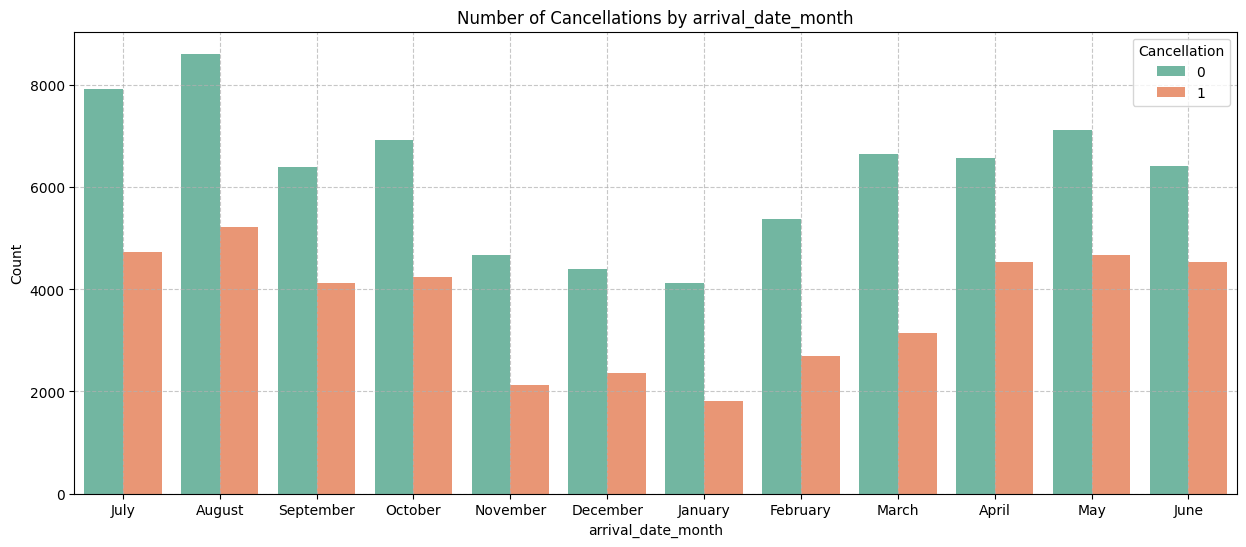

In [46]:
plt.figure(figsize=(15, 6))
sns.countplot(x='arrival_date_month', hue='is_canceled', data=df, palette='Set2')
plt.title('Number of Cancellations by arrival_date_month')
plt.xlabel('arrival_date_month')
plt.ylabel('Count')
plt.legend(title='Cancellation')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


### From arrival_date_month feature we can say that peak season for hotels is except November, December, January and February month. 

# Heatmap
### To check correlation of numeric features

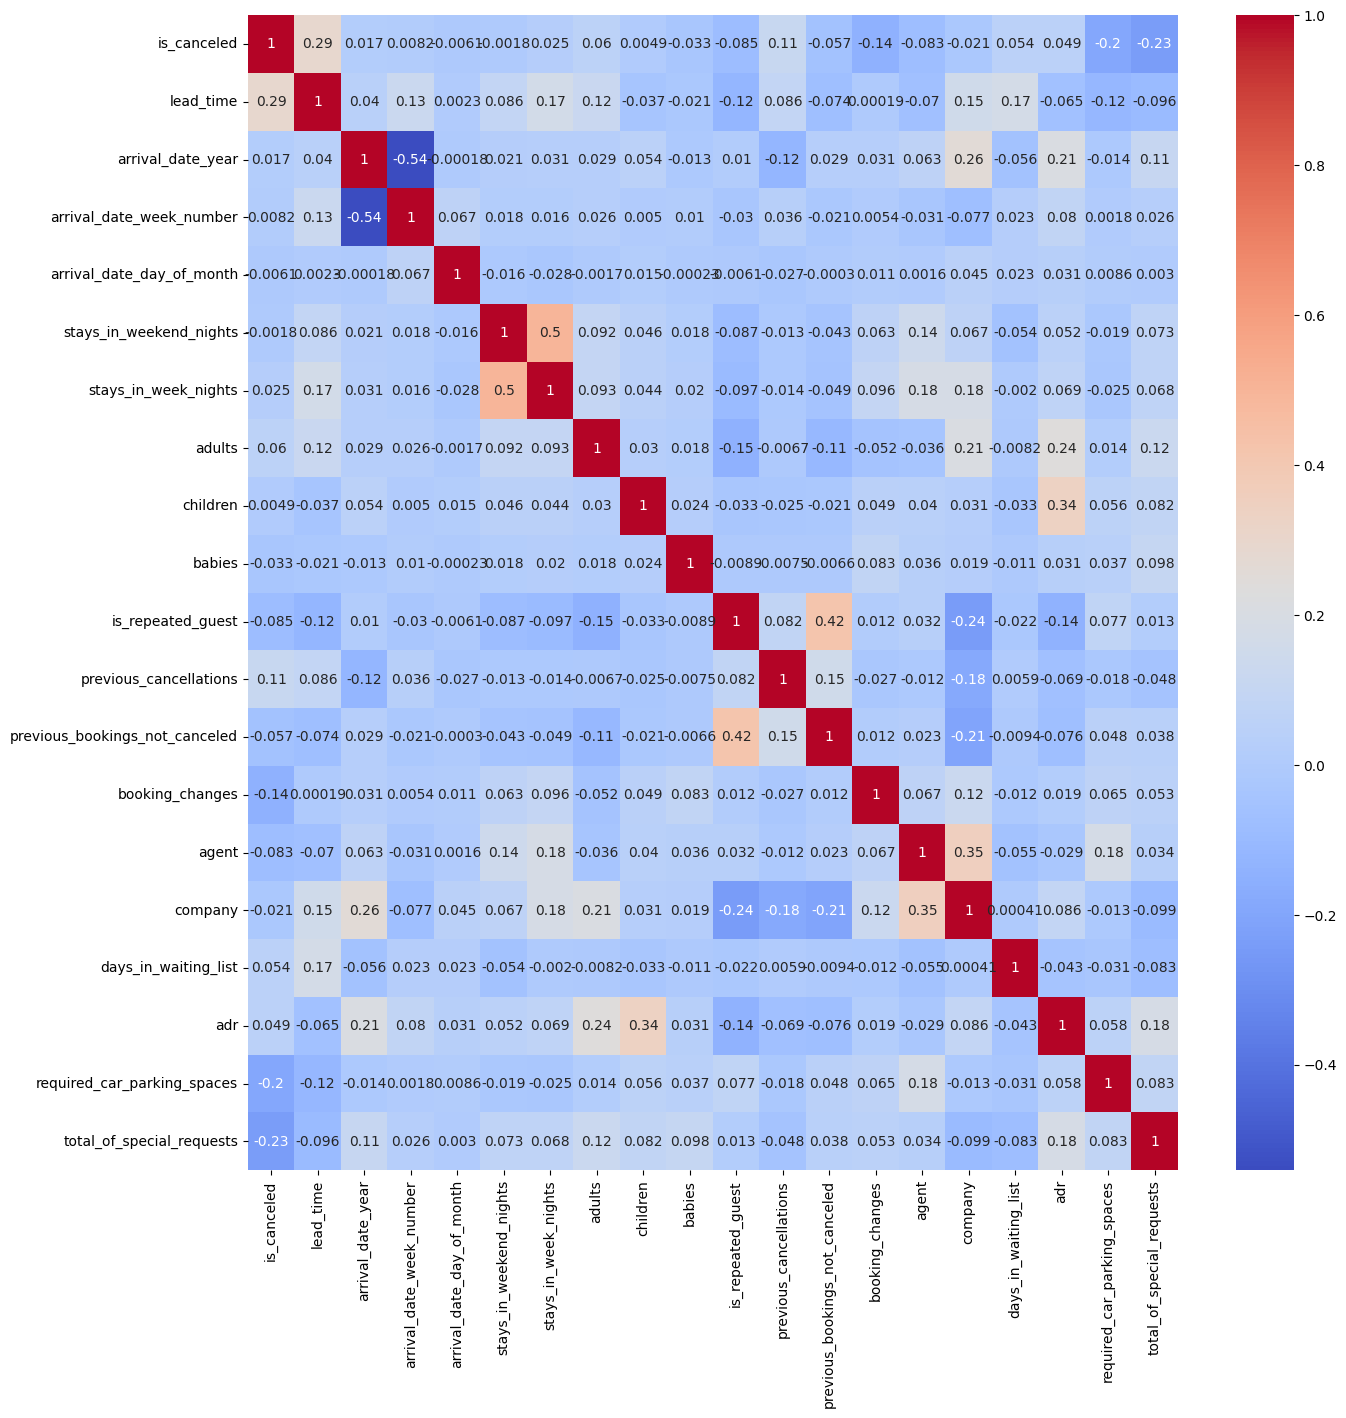

In [48]:
df_numeric_features = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(15,15))
sns.heatmap(df_numeric_features.corr(), annot= True, cmap= 'coolwarm')
plt.show()

### For check correlation between each feature I create heatmap. I found correlation between is_canceled with these except lead_time and previous_cancellations features.

# Categorical Data visualization

# Bar plots
### To visualize the frequency of categorical variables.

In [50]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status'],
      dtype='object')

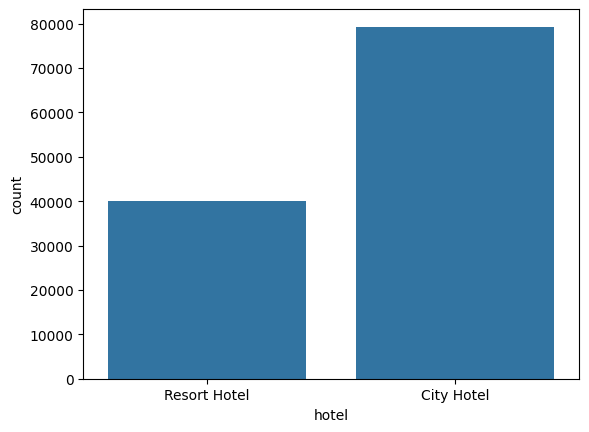

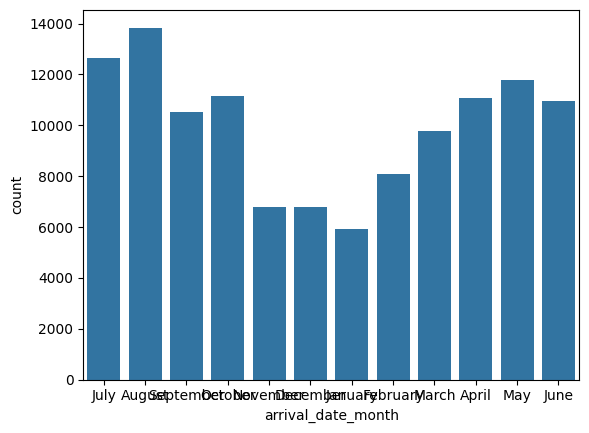

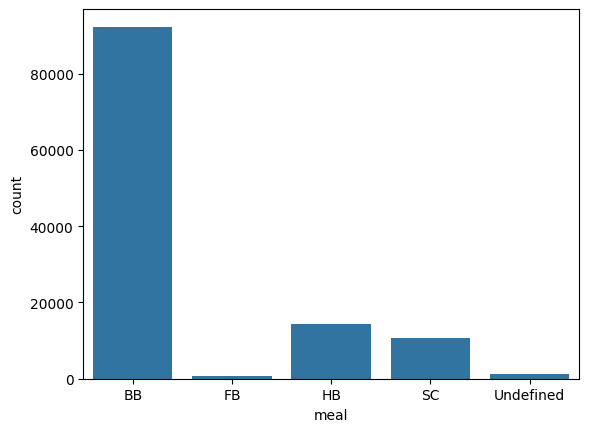

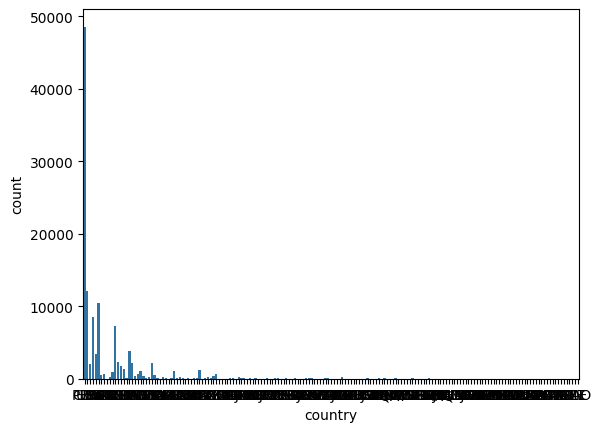

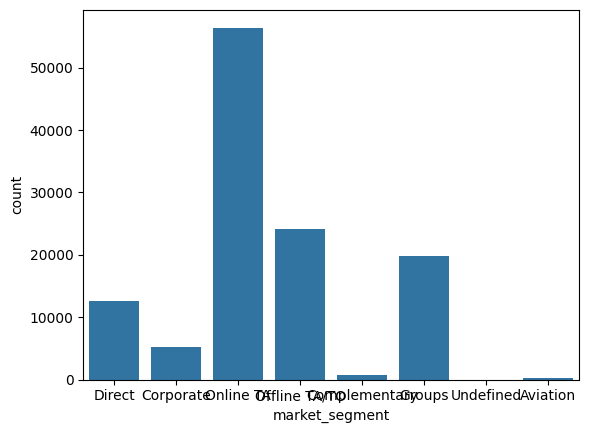

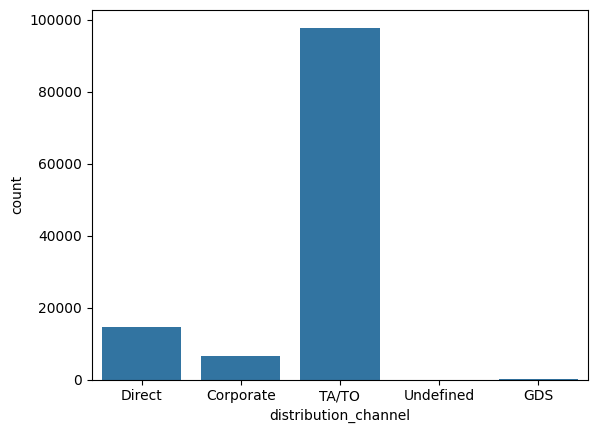

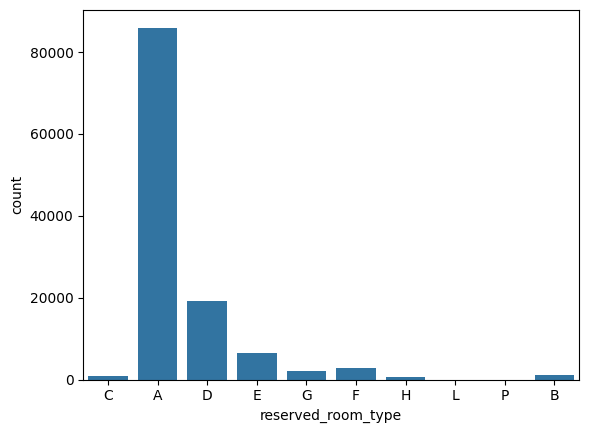

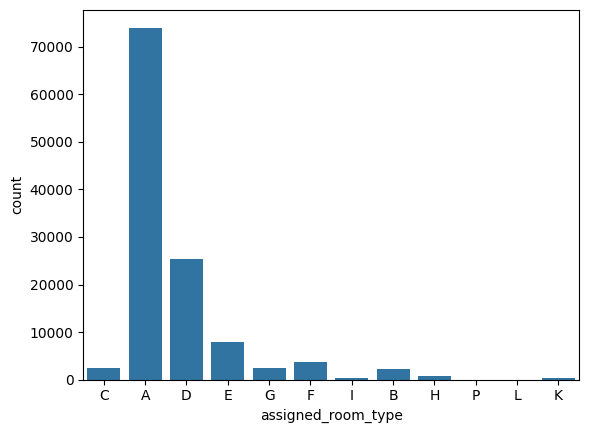

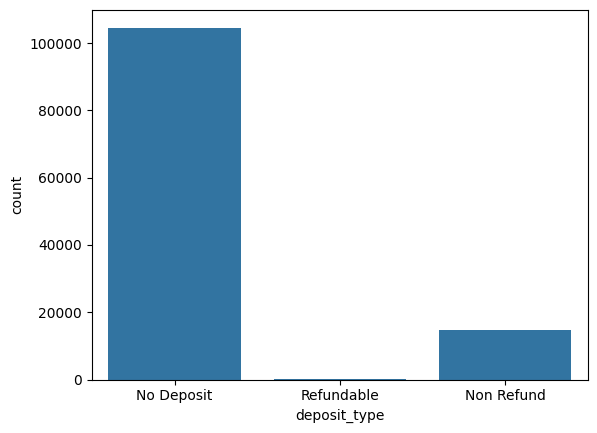

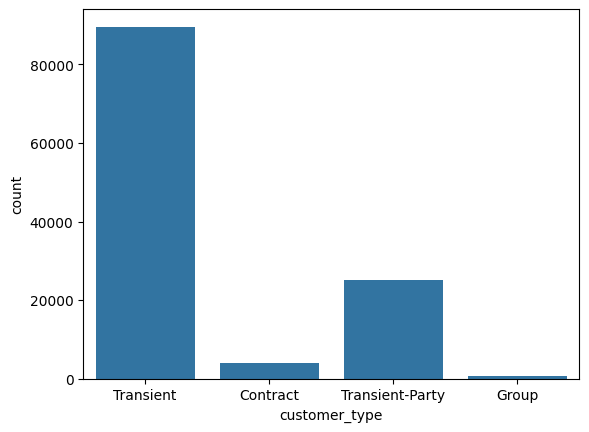

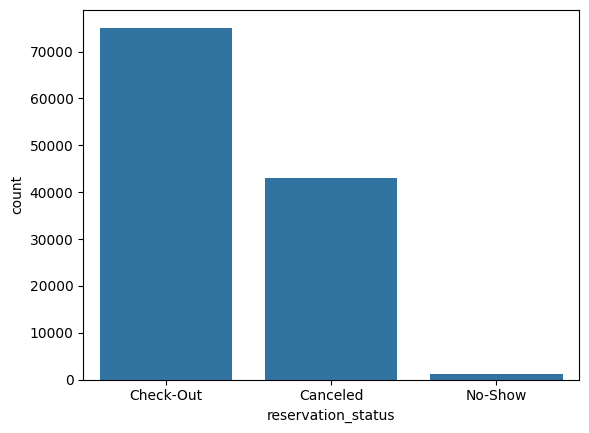

In [52]:
for i in categorical_features:
    sns.countplot(x=i, data = df)
    plt.show()

# Feature selection and Feature engineering

## Remove directly related features

#### The feature in question has only two distinct values: "check-out" corresponds to a target value of 1, while "canceled reservation_status" corresponds to a target value of 0. This direct relationship with the target variable means that this feature will not add meaningful variability to the model. Therefore, we should drop this feature from our dataset.

In [53]:
df.drop(["reservation_status"], axis = 1, inplace = True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,reservation_status_day,reservation_status_month,reservation_status_year
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,2015-07-01,1,7,2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,2015-07-01,1,7,2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,2015-07-02,2,7,2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,2015-07-02,2,7,2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.0,0,1,2015-07-03,3,7,2015


# To check difference between arrival date and reservation status date

In [54]:
df['reservation_status_days_difference'] = (df['reservation_status_date'] - pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str))).dt.days

df[['reservation_status_days_difference']].head()

,reservation_status_days_difference
0,0
1,0
2,1
3,1
4,2


## To check data distribution of reservation_status_days_difference feature

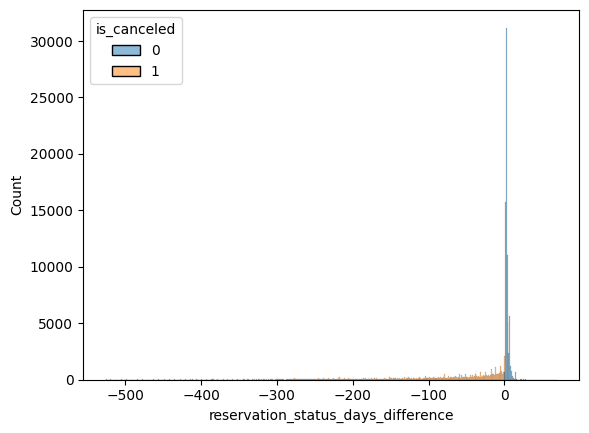

In [55]:
sns.histplot(data = df, x = "reservation_status_days_difference", hue = "is_canceled")
plt.show()

In [56]:
df["reservation_status_days_difference"].value_counts()

reservation_status_days_difference
1     15743
3     15718
2     15471
4     11018
7      5676
      ...  
69        1
45        1
56        1
38        1
27        1
Name: count, Length: 433, dtype: int64

#### As checked the difference between arrival date and reservation status date is more unique values and its not useful in our model training so that why i drop these features

In [57]:
df.drop(["reservation_status_date", "reservation_status_days_difference","reservation_status_day","reservation_status_month","reservation_status_year"], axis=1, inplace = True)

#### Rooms are assigned after the booking is made, so it cannot be used to predict cancellations. Thats why we drop this feature

In [58]:
df.drop(["assigned_room_type"], axis = 1, inplace = True)

In [59]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'booking_changes', 'deposit_type', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

## Drop irrelevant features

In [61]:
df['arrival_date_year'].value_counts()

arrival_date_year
2016    56691
2017    40651
2015    21995
Name: count, dtype: int64

#### This feature only includes a few years, and if we want to build a model that generalizes well to future data, it could be bias the model towards specific years. So we drop it.

In [62]:
df.drop(['arrival_date_year'], axis=1, inplace = True)

# Check missing values

In [63]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16336
company                           112540
days_in_waiting_list                   0
customer_type   

# Check percentage of missing values

In [65]:
df.isna().sum()/len(df)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003352
babies                             0.000000
meal                               0.000000
country                            0.408926
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                             13.688965
company                         

# Check unique values of features which contains null values

In [66]:
df["children"].value_counts()

children
0.0     110783
1.0       4843
2.0       3631
3.0         75
10.0         1
Name: count, dtype: int64

In [67]:
df["country"].value_counts()

country
PRT    48566
GBR    12127
FRA    10412
ESP     8556
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

In [68]:
df["agent"].value_counts()

agent
9.0      31960
240.0    13892
1.0       7191
14.0      3639
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: count, Length: 333, dtype: int64

In [69]:
df["company"].value_counts()

company
40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
104.0      1
531.0      1
160.0      1
413.0      1
386.0      1
Name: count, Length: 352, dtype: int64

### In the features of country, company and agent we found missing values also most of unique values , so we drop those features.

In [70]:
df.drop(["country","agent","company"], axis = 1, inplace = True)

In [71]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [72]:
df.shape

(119337, 25)

# Handle missing values

### We fill missing values of children feature with 0 because it contains only 5 unique values and if we use mode to fill the data it also fill with 0. 

In [74]:
df["children"].fillna("0", inplace = True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119337 entries, 0 to 119389
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119337 non-null  object 
 1   is_canceled                     119337 non-null  int64  
 2   lead_time                       119337 non-null  int64  
 3   arrival_date_month              119337 non-null  object 
 4   arrival_date_week_number        119337 non-null  int64  
 5   arrival_date_day_of_month       119337 non-null  int64  
 6   stays_in_weekend_nights         119337 non-null  int64  
 7   stays_in_week_nights            119337 non-null  int64  
 8   adults                          119337 non-null  int64  
 9   children                        119337 non-null  object 
 10  babies                          119337 non-null  int64  
 11  meal                            119337 non-null  object 
 12  market_segment       

# Check outliers

# Box plot

### Check outliers from numerical features

In [76]:
target = "is_canceled"
numeric_features = df.select_dtypes(include=['int64', 'float64']).drop(columns= target)
numeric_features.columns

Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

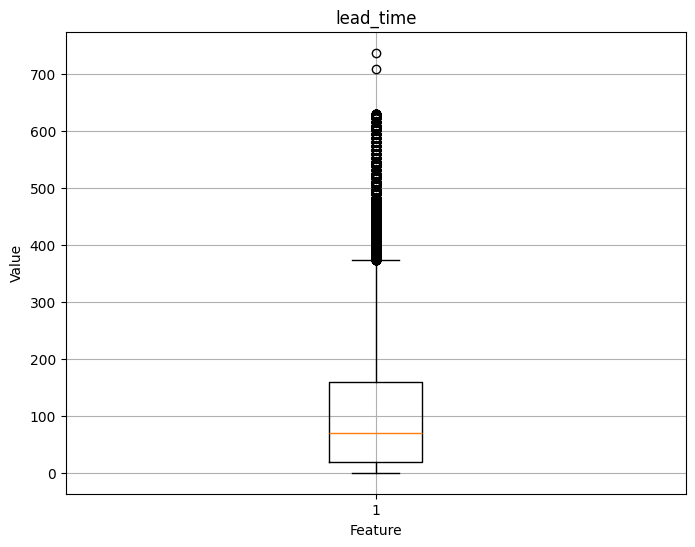

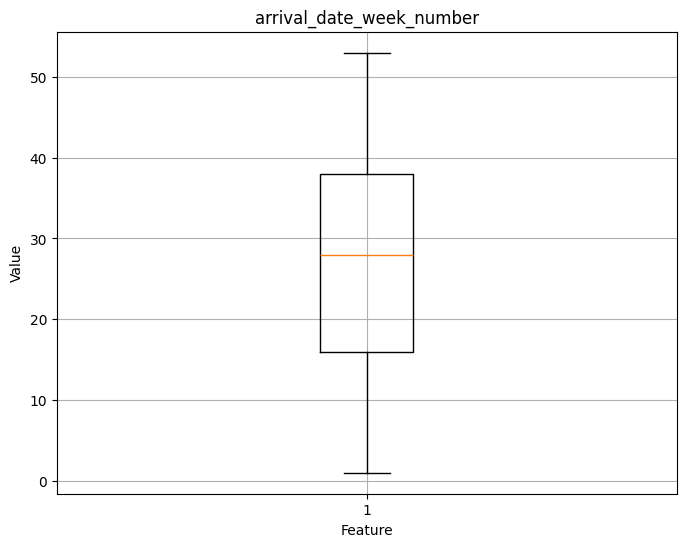

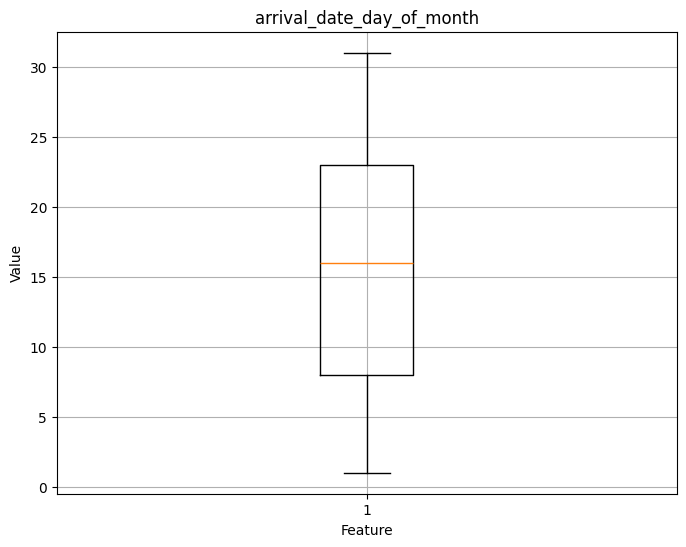

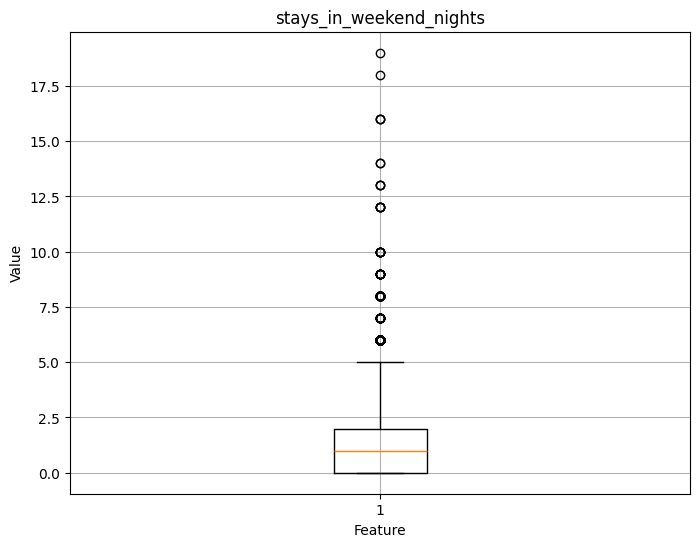

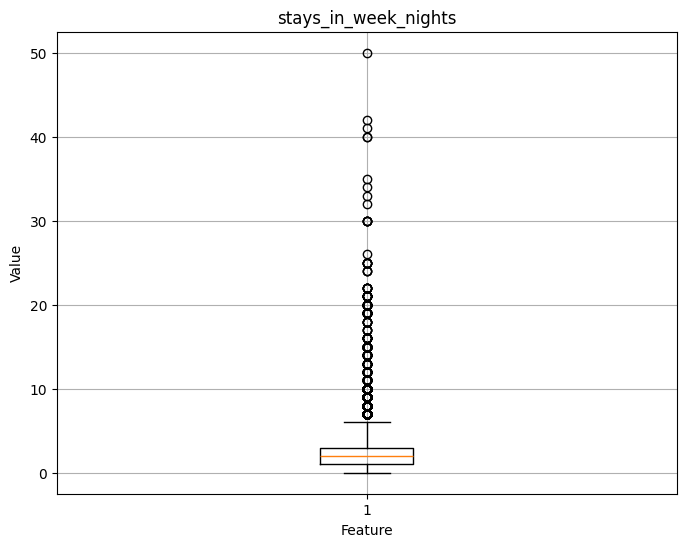

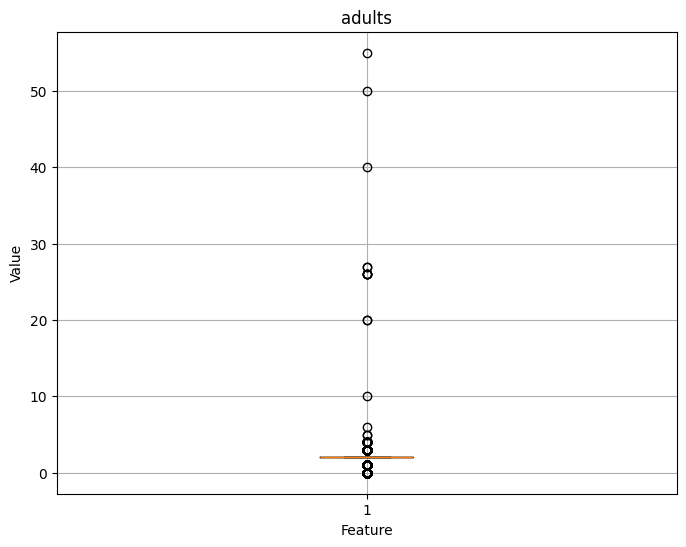

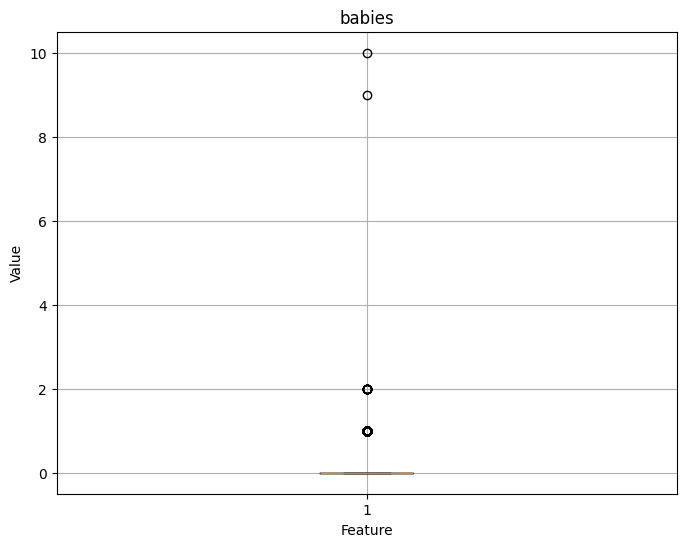

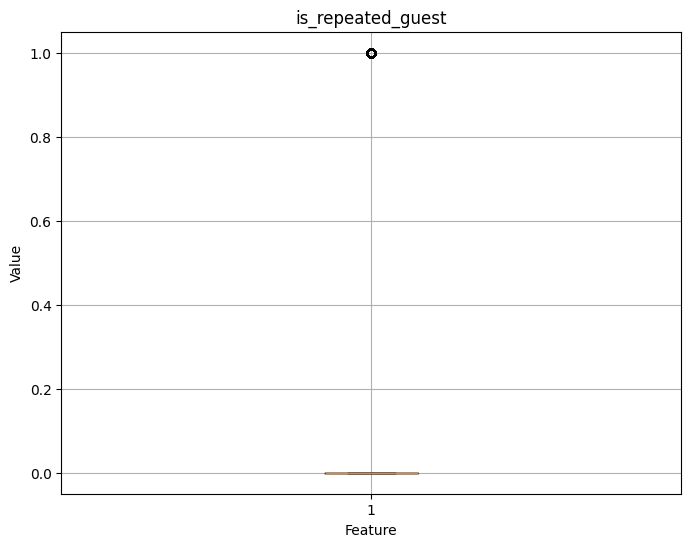

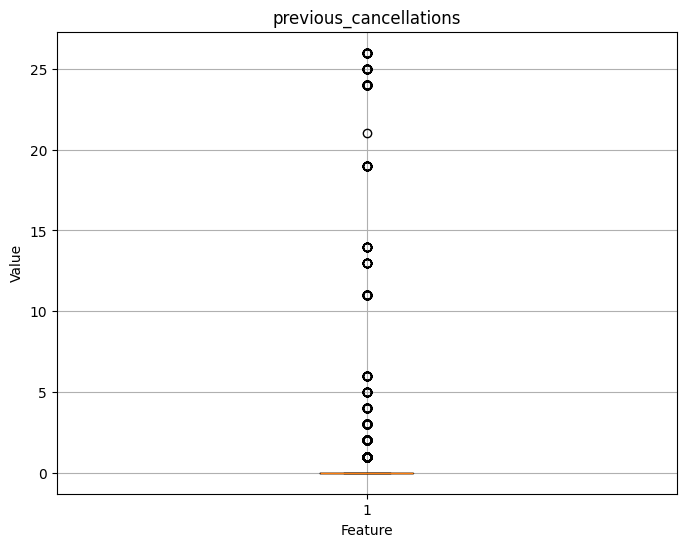

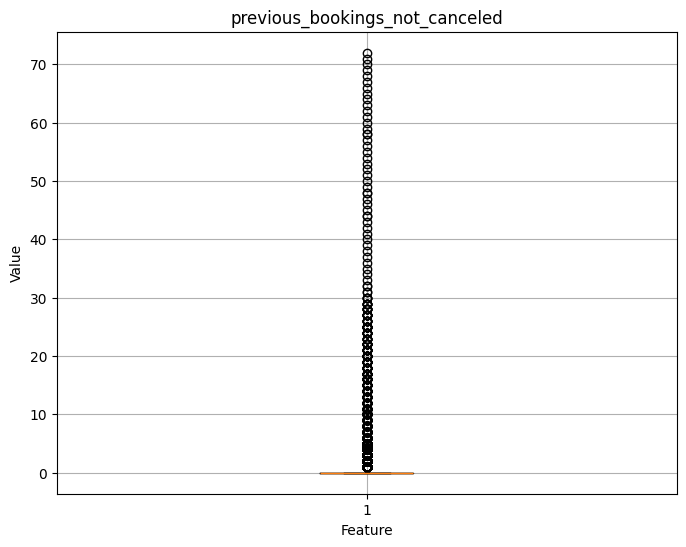

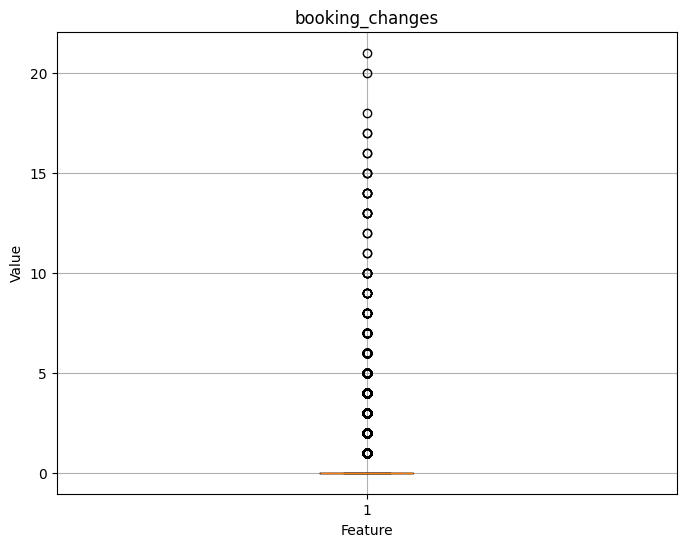

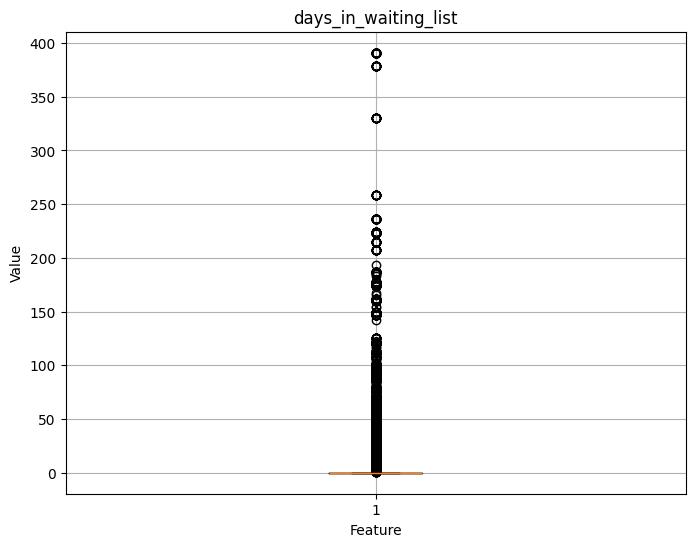

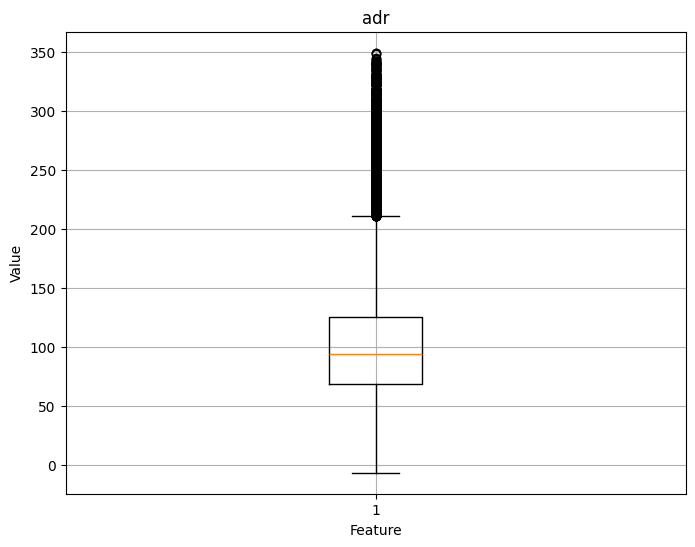

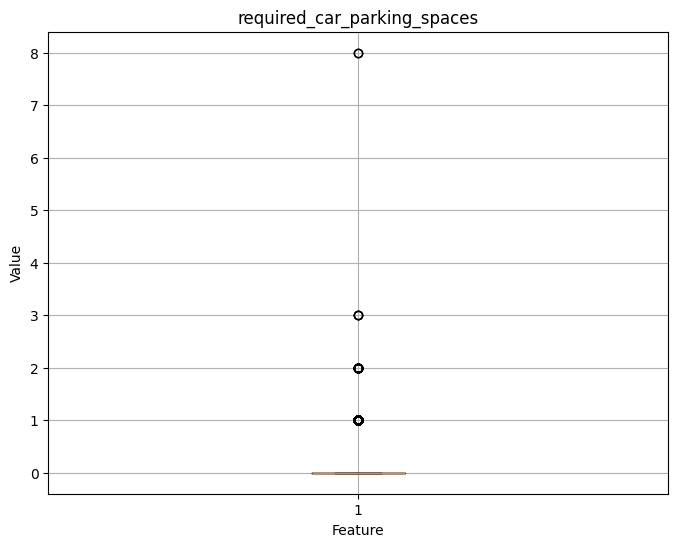

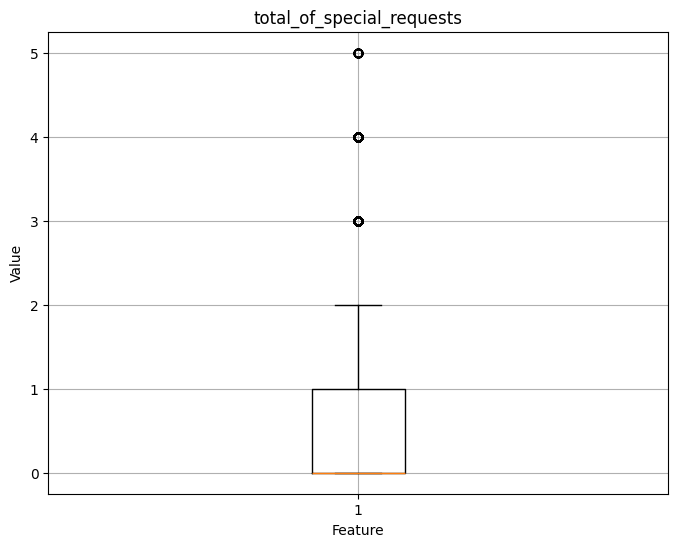

In [77]:
for i in numeric_features.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[i])
    plt.title(i)
    plt.xlabel('Feature')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

# Hypothesis testing

# Case 1 : Customers booking more than 6 months in advance are more likely to cancel.

In [78]:
df['booked_in_advance'] = df['lead_time'] > 180

In [79]:
contingency_table = pd.crosstab(df['booked_in_advance'], df['is_canceled'])

In [80]:
# Perform Chi-Square Test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

Chi-Square Statistic: 5319.139713597772
P-Value: 0.0


In [81]:
# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Booking more than 6 months in advance is associated with a higher cancellation rate.")
else:
    print("Fail to reject the null hypothesis: No significant association between booking in advance and cancellation rate.")

Reject the null hypothesis: Booking more than 6 months in advance is associated with a higher cancellation rate.


# Case 2: Weekday bookings have a higher average daily rate than weekend bookings

In [82]:
df['is_weekend'] = df['arrival_date_week_number'] % 7 >= 5  # Assuming weekend is Saturday and Sunday

In [83]:
# Separate ADR values based on booking days
adr_weekday = df[df['is_weekend'] == False]['adr']
adr_weekend = df[df['is_weekend'] == True]['adr']

In [84]:
# Perform T-Test
t_stat, p_value = ttest_ind(adr_weekday, adr_weekend, equal_var=False)  # Use equal_var=False for Welch’s t-test

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Weekday bookings have a significantly higher ADR than weekend bookings.")
else:
    print("Fail to reject the null hypothesis: No significant difference in ADR between weekday and weekend bookings.")

T-Statistic: -9.225181497493903
P-Value: 2.927861452716768e-20
Reject the null hypothesis: Weekday bookings have a significantly higher ADR than weekend bookings.


# Convert categorical features into numerical

### The 'arrival_date_month' feature contains the months and months have a natural order so we use apply function to convert it in numerical

In [85]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: months.index(x) + 1)

### For other features we use one hot encoding

In [86]:
one_hot_cols = ["hotel", "meal", "market_segment", "distribution_channel", "reserved_room_type", "deposit_type", "customer_type"]
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [87]:
df = df.astype(int)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119337 entries, 0 to 119389
Data columns (total 50 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   is_canceled                     119337 non-null  int32
 1   lead_time                       119337 non-null  int32
 2   arrival_date_month              119337 non-null  int32
 3   arrival_date_week_number        119337 non-null  int32
 4   arrival_date_day_of_month       119337 non-null  int32
 5   stays_in_weekend_nights         119337 non-null  int32
 6   stays_in_week_nights            119337 non-null  int32
 7   adults                          119337 non-null  int32
 8   children                        119337 non-null  int32
 9   babies                          119337 non-null  int32
 10  is_repeated_guest               119337 non-null  int32
 11  previous_cancellations          119337 non-null  int32
 12  previous_bookings_not_canceled  119337 non-null  

# Check nature of targe feature

In [89]:
df["is_canceled"].value_counts()/len(df["is_canceled"])*100

is_canceled
0    62.957004
1    37.042996
Name: count, dtype: float64

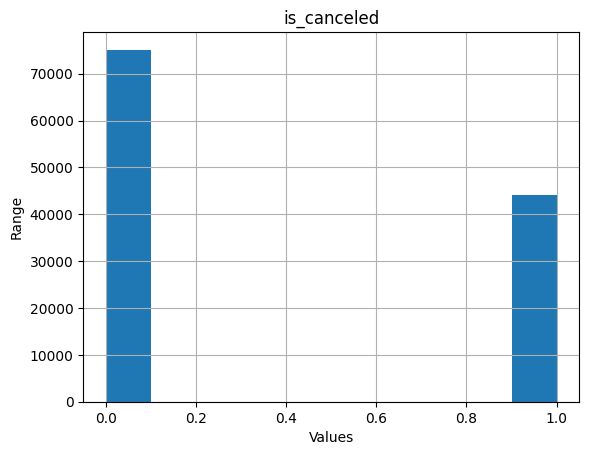

In [90]:
df["is_canceled"].hist()
plt.title("is_canceled")
plt.xlabel("Values")
plt.ylabel("Range")
plt.show()


### It seems 62% of bookings were not cancelled and 37% were cancelled. This indicates that there is some imbalance in the target feature. To balance the dataset, we can also use resampling techniques.

# Split the Dataset for training and testing

In [91]:
df = df.apply(pd.to_numeric, errors='coerce')
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 119337 entries, 0 to 119389
Data columns (total 50 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   is_canceled                     119337 non-null  int32
 1   lead_time                       119337 non-null  int32
 2   arrival_date_month              119337 non-null  int32
 3   arrival_date_week_number        119337 non-null  int32
 4   arrival_date_day_of_month       119337 non-null  int32
 5   stays_in_weekend_nights         119337 non-null  int32
 6   stays_in_week_nights            119337 non-null  int32
 7   adults                          119337 non-null  int32
 8   children                        119337 non-null  int32
 9   babies                          119337 non-null  int32
 10  is_repeated_guest               119337 non-null  int32
 11  previous_cancellations          119337 non-null  int32
 12  previous_bookings_not_canceled  119337 non-null  

is_canceled                       0
lead_time                         0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
booked_in_advance                 0
is_weekend                        0
hotel_Resort Hotel                0
meal_FB                           0
meal_HB                           0
meal_SC                           0
meal_Undefined                    0
market_segment_Complementary      0
market_segment_Corporate          0
market_segment_Direct       

In [92]:
x = df.drop("is_canceled", axis=1)
y = df["is_canceled"]

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [94]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95469 entries, 13265 to 7718
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   lead_time                       95469 non-null  int32
 1   arrival_date_month              95469 non-null  int32
 2   arrival_date_week_number        95469 non-null  int32
 3   arrival_date_day_of_month       95469 non-null  int32
 4   stays_in_weekend_nights         95469 non-null  int32
 5   stays_in_week_nights            95469 non-null  int32
 6   adults                          95469 non-null  int32
 7   children                        95469 non-null  int32
 8   babies                          95469 non-null  int32
 9   is_repeated_guest               95469 non-null  int32
 10  previous_cancellations          95469 non-null  int32
 11  previous_bookings_not_canceled  95469 non-null  int32
 12  booking_changes                 95469 non-null  int32
 13  day

In [95]:
y_train.value_counts()

is_canceled
0    60104
1    35365
Name: count, dtype: int64

# Logistic Regression model

In [96]:
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
y_pred = model.predict(x_test)

In [98]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.94      0.86     15027
           1       0.84      0.60      0.70      8841

    accuracy                           0.81     23868
   macro avg       0.82      0.77      0.78     23868
weighted avg       0.82      0.81      0.80     23868



# Random Forest model

In [99]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

In [100]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [101]:
y_pred = rf_model.predict(x_test)

# Accuracy before hyperparameter tunning

In [102]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     15027
           1       0.86      0.75      0.80      8841

    accuracy                           0.86     23868
   macro avg       0.86      0.84      0.85     23868
weighted avg       0.86      0.86      0.86     23868



# Hyperparameter tunning 

In [103]:
param_grid_rf = {
    'n_estimators': [100, 150],
    'criterion': ['entropy'],
    'max_depth': [16, 18],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'class_weight': [{0: 1, 1: w} for w in [1, 2, 3]]
}

In [104]:
# Function to tune hyperparameters of a classifier
def tune_clf_hyperparameters(rf_model, param_grid_rf, x_train, y_train):
    # Initialize GridSearchCV with the classifier and parameter grid
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, 
                               cv=5, n_jobs=-1, verbose=2)
    
    # Fit the grid search model to find the best parameters
    grid_search.fit(x_train, y_train)
    
    # Return the best model and the best parameters found by GridSearchCV
    return grid_search.best_estimator_, grid_search.best_params_

In [105]:
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_model, param_grid_rf, x_train, y_train)  # get best hyperparameter

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 33.7min finished


In [106]:
best_rf_hyperparams

{'class_weight': {0: 1, 1: 1},
 'criterion': 'entropy',
 'max_depth': 18,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

# Accuracy after hyperparameter tunning

In [107]:
y_pred_after = best_rf.predict(x_test)

In [108]:
report_after = classification_report(y_test, y_pred_after)
print(report_after)

              precision    recall  f1-score   support

           0       0.84      0.94      0.88     15027
           1       0.86      0.69      0.77      8841

    accuracy                           0.84     23868
   macro avg       0.85      0.81      0.83     23868
weighted avg       0.85      0.84      0.84     23868



# XGboost model

In [109]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [110]:
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='binary:logistic', ...)

In [111]:
y_pred_xgb_before = xgb_model.predict(x_test)

# Accuracy before hyperparameter tunning

In [112]:
xgb_before_report = classification_report(y_test, y_pred_xgb_before)
print(xgb_before_report)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88     15027
           1       0.84      0.71      0.77      8841

    accuracy                           0.84     23868
   macro avg       0.84      0.81      0.82     23868
weighted avg       0.84      0.84      0.84     23868



# Hyparameter Tunning

In [113]:
param_grid_xgb = {
    'n_estimators': [250, 350],
    'learning_rate': [0.01, 0.1],
    'max_depth': [7, 8],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.8, 0.9],
    'scale_pos_weight': [1, (y_train == 0).sum() / (y_train == 1).sum()]
}

In [114]:
# Function to tune hyperparameters of a classifier
def tune_clf_hyperparameters(xgb_model, param_grid_xgb, x_train, y_train):
    # Initialize GridSearchCV with the classifier and parameter grid
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, 
                               cv=5, n_jobs=-1, verbose=2)
    
    # Fit the grid search model to find the best parameters
    grid_search.fit(x_train, y_train)
    
    # Return the best model and the best parameters found by GridSearchCV
    return grid_search.best_estimator_, grid_search.best_params_

In [115]:
best_xgb, best_dxgb_hyperparams = tune_clf_hyperparameters(xgb_model, param_grid_xgb, x_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   58.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 13.9min finished


In [116]:
best_dxgb_hyperparams

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators': 350,
 'scale_pos_weight': 1,
 'subsample': 0.8}

# Accuracy after hyperparameter tunning

In [117]:
y_pred__xgb_after = best_xgb.predict(x_test)

In [118]:
xgb_after_report = classification_report(y_test, y_pred__xgb_after)
print(xgb_after_report)

              precision    recall  f1-score   support

           0       0.85      0.92      0.89     15027
           1       0.85      0.73      0.79      8841

    accuracy                           0.85     23868
   macro avg       0.85      0.83      0.84     23868
weighted avg       0.85      0.85      0.85     23868



# Conclusion

#### We developed and evaluated three models using the hotel bookings dataset: Logistic Regression, Random Forest, and XGBoost. After assessing their performance, we determined that the XGBoost model is the most effective, achieving an accuracy of 85% on this dataset. Given the imbalance in the dataset, we utilized the weighted average accuracy from the classification report to account for class disparities in our evaluation.